In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

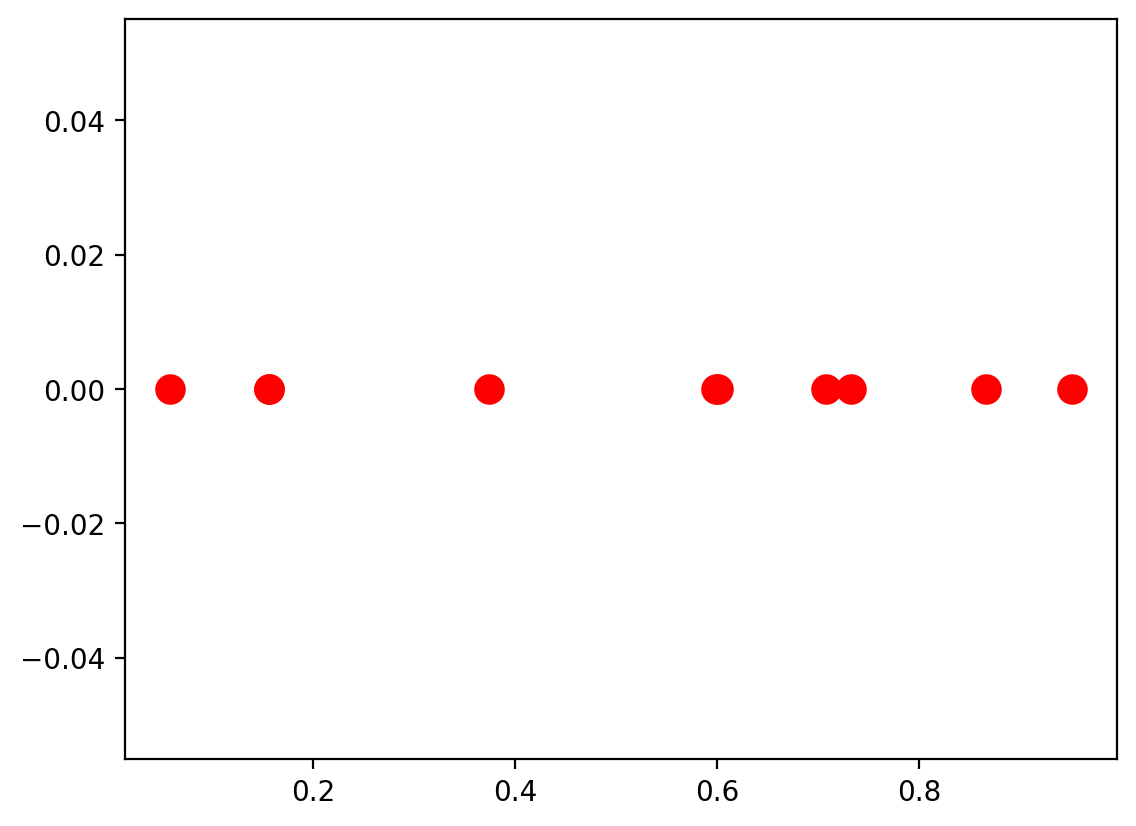

In [2]:
# 
n = 10
np.random.seed(42)
# Get `n` points in 1d space uniformly distributed from 0 to 1
x = np.random.uniform(0, 1, n)
plt.scatter(x, np.zeros(n), c='r', s=100)

Ratio of distances: [0.04356313]


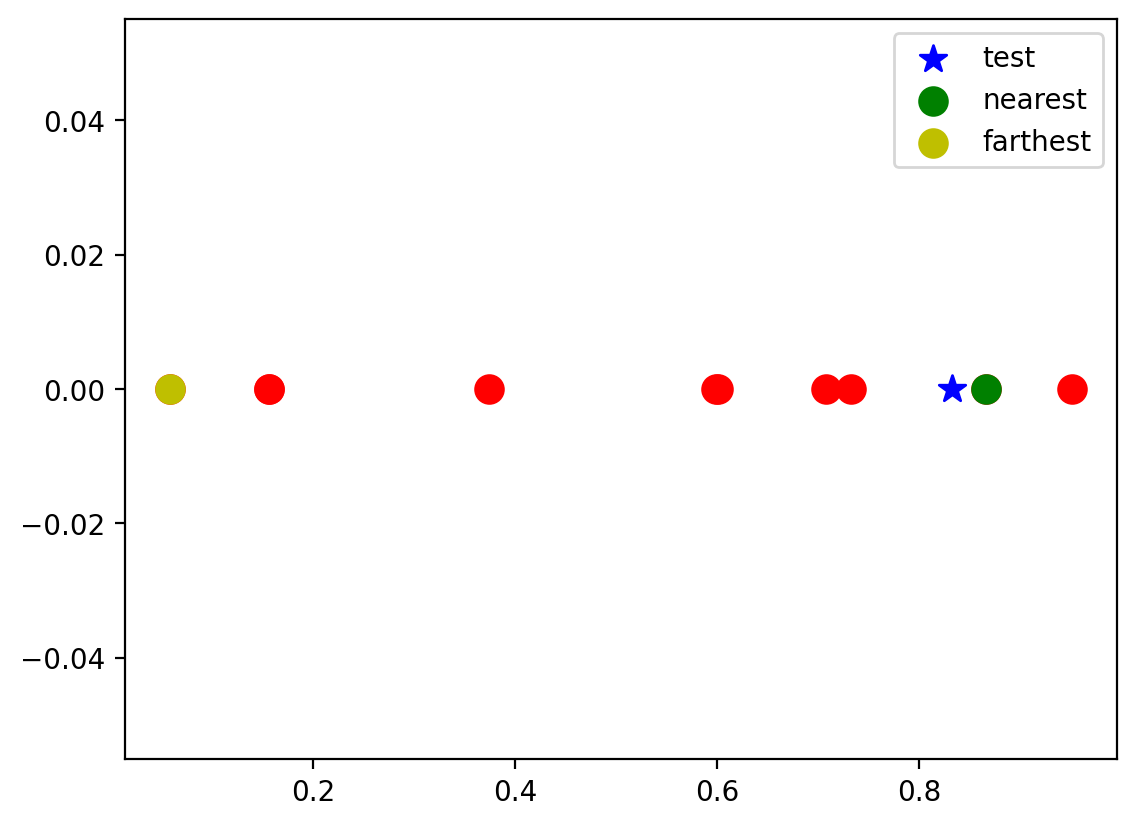

In [5]:
# Pick a random test point

x_test = np.random.uniform(0, 1, 1)


# Mark the nearest point and farthest point
x_nearest = x[np.argmin(np.abs(x - x_test))]
x_farthest = x[np.argmax(np.abs(x - x_test))]

plt.scatter(x, np.zeros(n), c='r', s=100)
plt.scatter(x_test, 0, c='b', s=100, marker='*', label='test')
plt.scatter(x_nearest, 0, c='g', s=100, label='nearest')
plt.scatter(x_farthest, 0, c='y', s=100, label='farthest')
plt.legend()

ratio = np.abs(x_test - x_nearest) / np.abs(x_test - x_farthest)
print('Ratio of distances: {}'.format(ratio))

In [6]:
# Do the above experiment for 1000 times

n = 10
np.random.seed(42)

n_exp = 1000
ratios = np.zeros(n_exp)
for i in range(n_exp):
    x = np.random.uniform(0, 1, n)
    x_test = np.random.uniform(0, 1, 1)
    x_nearest = x[np.argmin(np.abs(x - x_test))]
    x_farthest = x[np.argmax(np.abs(x - x_test))]
    ratios[i] = np.abs(x_test - x_nearest) / np.abs(x_test - x_farthest)

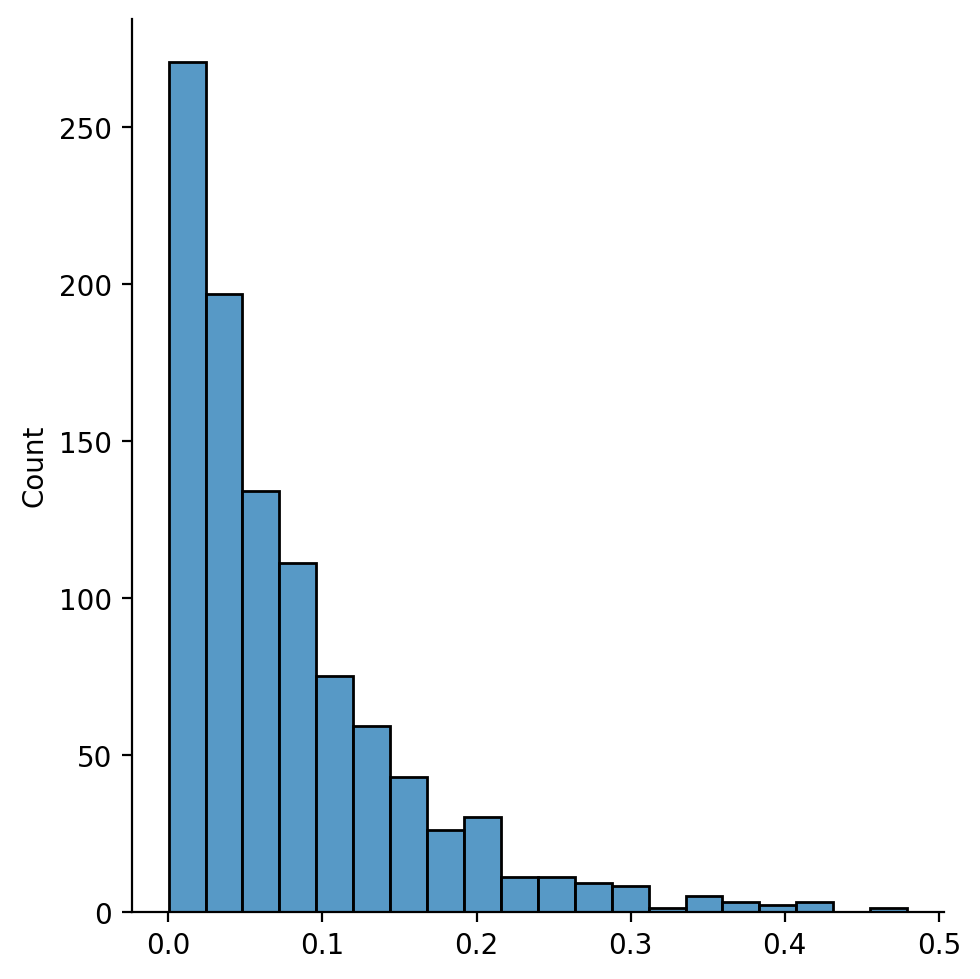

In [7]:
import seaborn as sns
sns.displot(ratios, kde=False, bins=20)

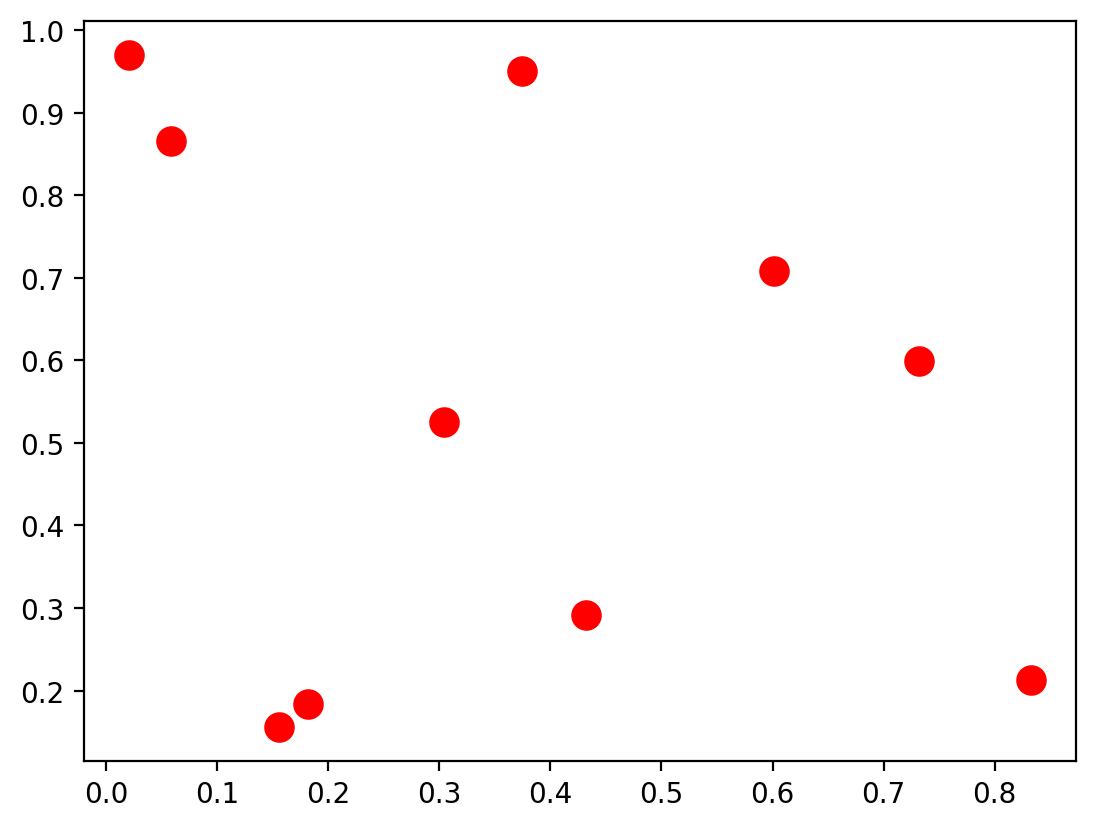

In [8]:
# Repeat the experiment in 2d

n = 10
np.random.seed(42)
x = np.random.uniform(0, 1, (n, 2))
plt.scatter(x[:, 0], x[:, 1], c='r', s=100)

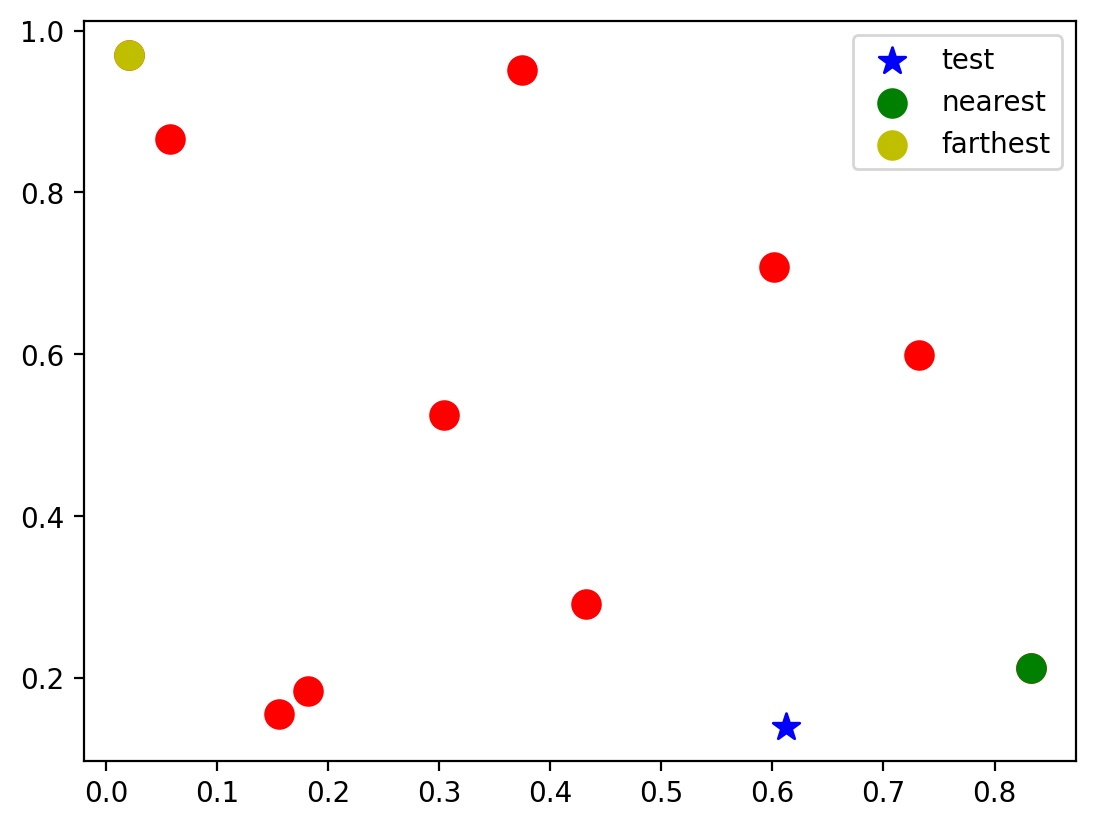

In [9]:
# Pick a random test point

x_test = np.random.uniform(0, 1, 2)

# Mark the nearest point and farthest point
x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]

plt.scatter(x[:, 0], x[:, 1], c='r', s=100)
plt.scatter(x_test[0], x_test[1], c='b', s=100, marker='*', label='test')
plt.scatter(x_nearest[0], x_nearest[1], c='g', s=100, label='nearest')
plt.scatter(x_farthest[0], x_farthest[1], c='y', s=100, label='farthest')
plt.legend()

In [10]:
# Find the ratio of distances between the nearest and farthest points in 1000 experiments

n = 10
np.random.seed(42)

ratios_2d = np.zeros(n_exp)
for i in range(n_exp):
    x = np.random.uniform(0, 1, (n, 2))
    x_test = np.random.uniform(0, 1, 2)
    x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
    x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]
    ratios_2d[i] = np.linalg.norm(x_test - x_nearest) / np.linalg.norm(x_test - x_farthest)

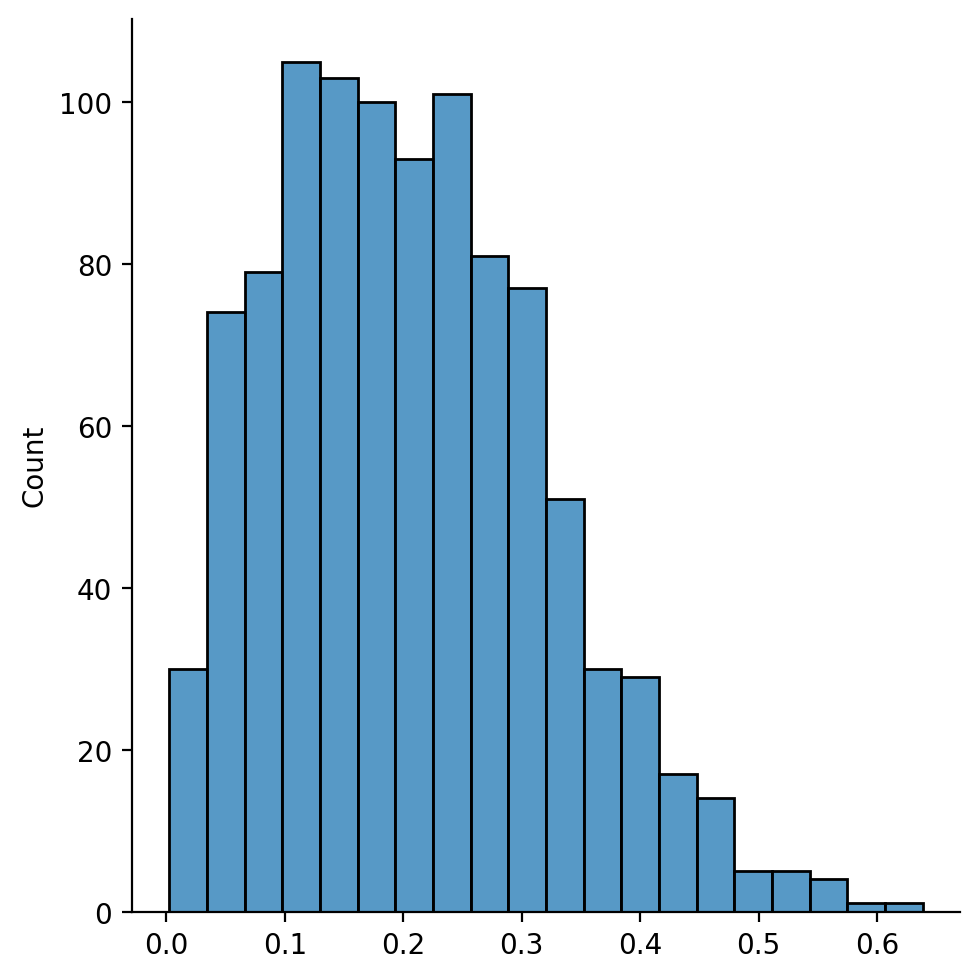

In [11]:
sns.displot(ratios_2d, kde=False, bins=20)

In [16]:
# Now, let's do the same experiment in dimensions varying from 1 to 20

n = 10
np.random.seed(42)
n_dim = 101
ratios_nd = np.zeros((n_exp, n_dim))
for i in range(n_exp):
    for d in range(1, n_dim + 1):
        x = np.random.uniform(0, 1, (n, d))
        x_test = np.random.uniform(0, 1, d)
        x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
        x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]
        ratios_nd[i, d - 1] = np.linalg.norm(x_test - x_nearest) / np.linalg.norm(x_test - x_farthest)


(0.0, 1.0)

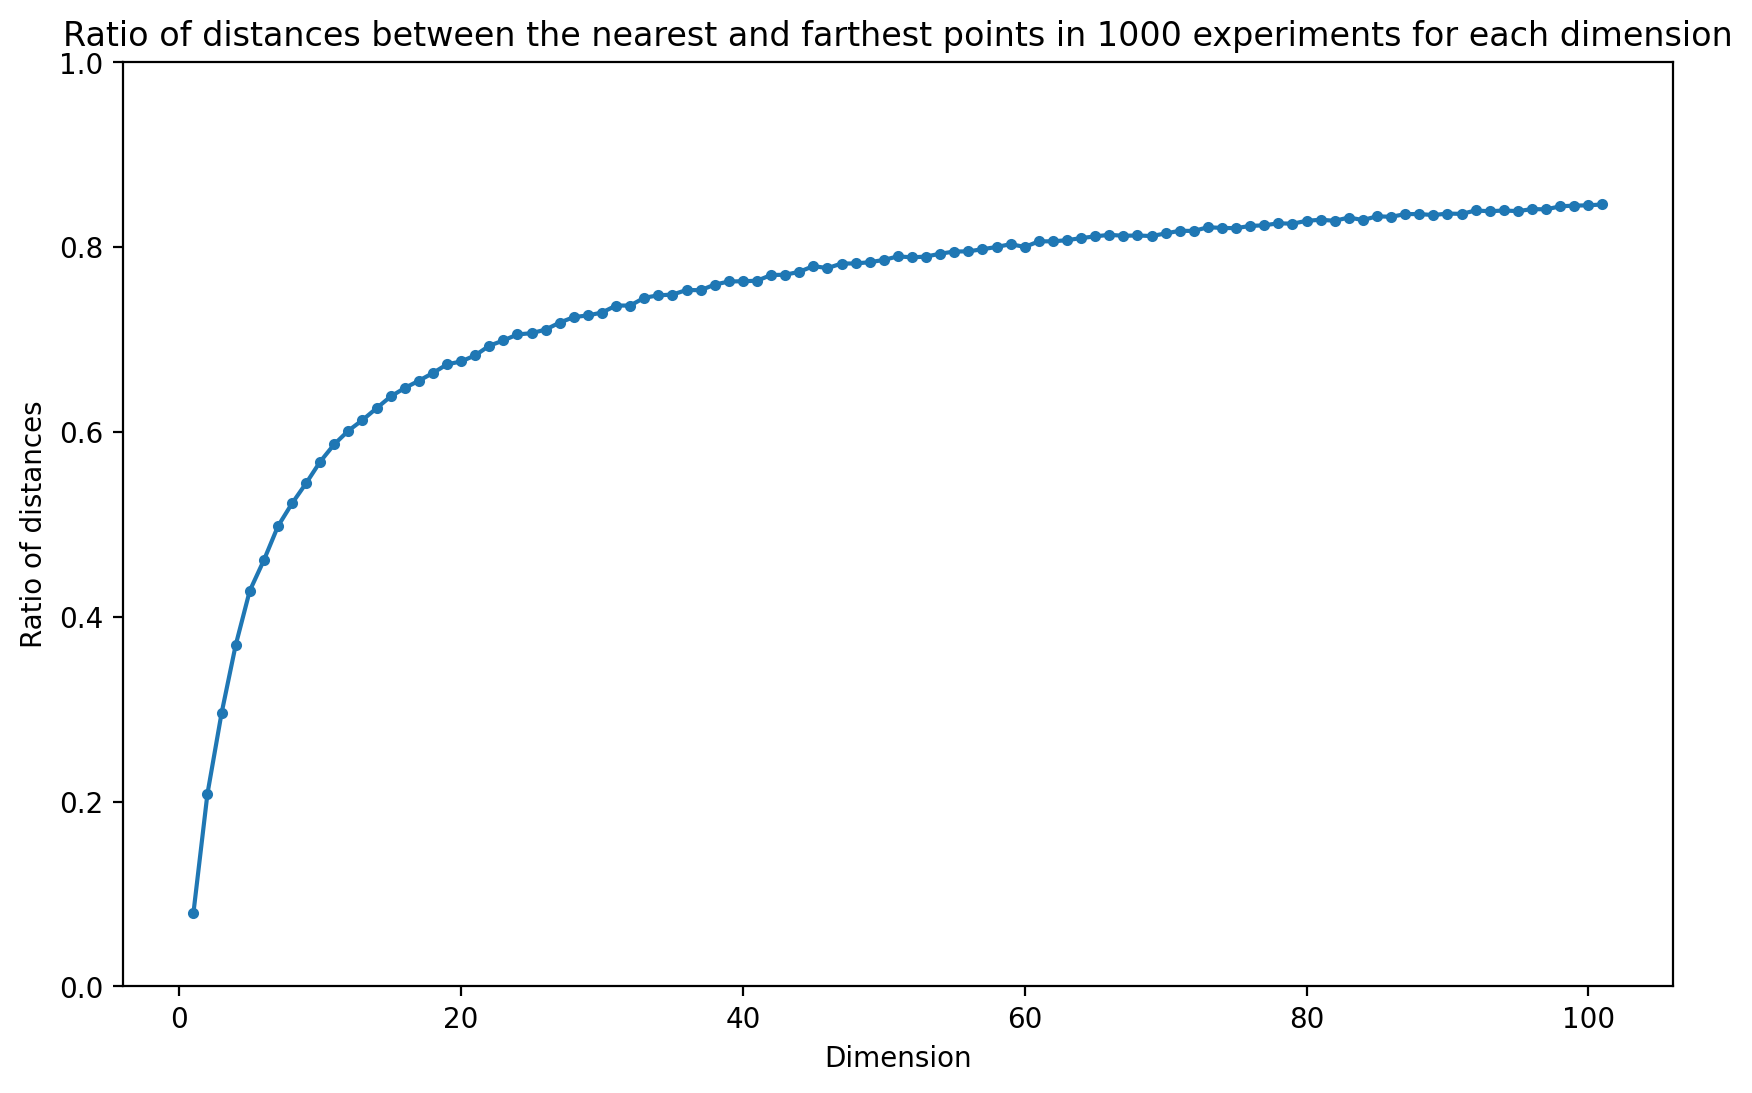

In [20]:
# Plot the ratio of distances between the nearest and farthest points in 1000 experiments for each dimension

from matplotlib import markers


plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n_dim + 1), np.mean(ratios_nd, axis=0), 'o-', markersize=3)
plt.xlabel('Dimension')
plt.ylabel('Ratio of distances')
plt.title('Ratio of distances between the nearest and farthest points in 1000 experiments for each dimension')
plt.ylim(0, 1.)

In [21]:
# Let us now see what happens if we have more points in higher dimensions
# 1d space: 10 points

n = 10
np.random.seed(42)
n_dim = 4
ratios_nd_more_points = np.zeros((n_exp, n_dim))
num_points = [10, 50, 200, 2000]
for i in range(n_exp):
    for d in range(1, n_dim + 1):
        x = np.random.uniform(0, 1, (num_points[d-1], d))
        x_test = np.random.uniform(0, 1, d)
        x_nearest = x[np.argmin(np.linalg.norm(x - x_test, axis=1))]
        x_farthest = x[np.argmax(np.linalg.norm(x - x_test, axis=1))]
        ratios_nd_more_points[i, d - 1] = np.linalg.norm(x_test - x_nearest) / np.linalg.norm(x_test - x_farthest)


In [34]:
import pandas as pd
cols = [(1, 10), (2, 50), (3, 200), (4, 2000)]
df = pd.DataFrame(ratios_nd_more_points, columns=cols)
df

,"(1, 10)","(2, 50)","(3, 200)","(4, 2000)"
0,0.040316,0.040880,0.081673,0.055671
1,0.056051,0.094828,0.139413,0.063989
2,0.098272,0.076760,0.163102,0.078649
3,0.213181,0.165776,0.055523,0.033316
4,0.011092,0.105754,0.070214,0.081415
...,...,...,...,...
995,0.005806,0.108972,0.075787,0.104469
996,0.178349,0.056938,0.067411,0.047147
997,0.006966,0.070710,0.061830,0.095790
998,0.047800,0.082439,0.095661,0.049558


(0.0, 1.0)

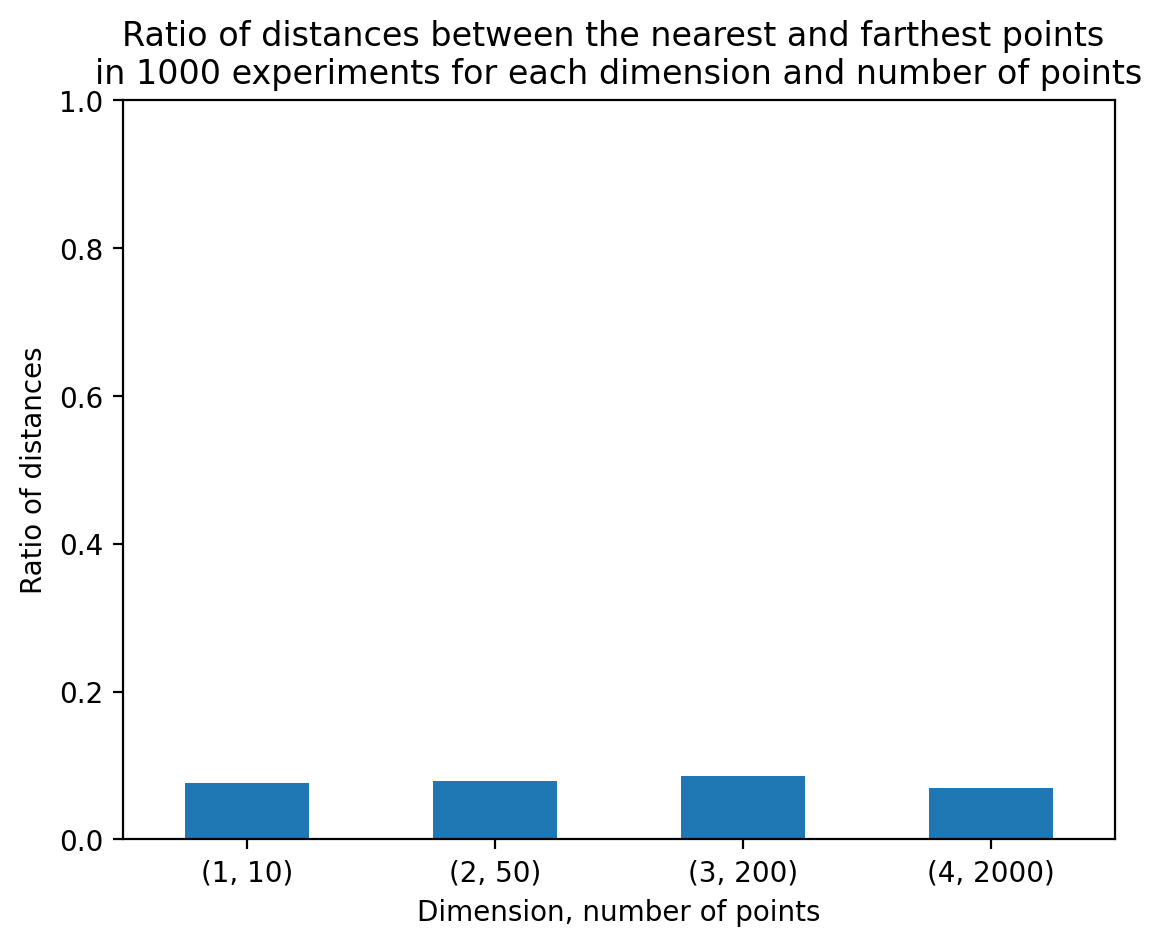

In [42]:
df.mean().plot(kind='bar', rot=0)
plt.ylabel('Ratio of distances')
plt.xlabel('Dimension, number of points')
_= plt.title('Ratio of distances between the nearest and farthest points \nin 1000 experiments for each dimension and number of points')
plt.ylim(0, 1.)

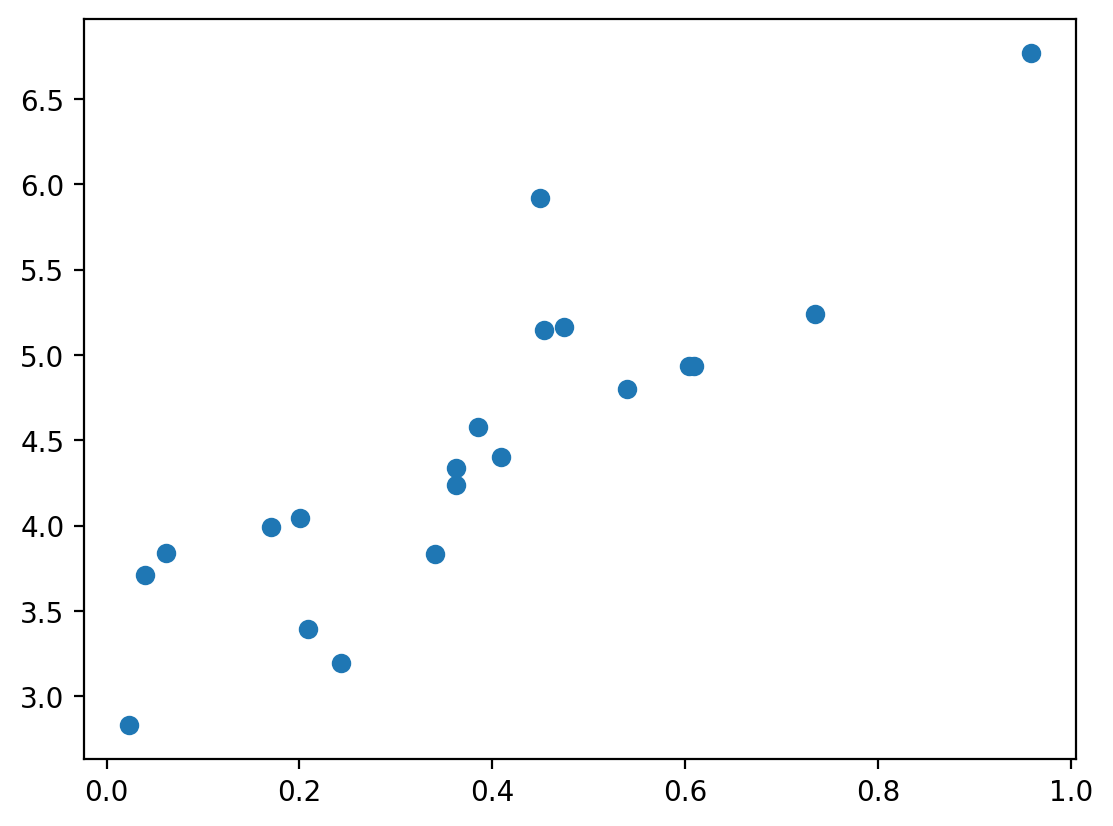

In [25]:
# Now showing how linear regression is affected by curse of dimensionality

n_points = 20

x = np.random.uniform(0, 1, (n_points, 1))
# sort the x values
x = np.sort(x, axis=0)
y = 4 * x + 3 + np.random.normal(0, 0.5, (n_points, 1))

plt.scatter(x, y)

In [26]:
# Let us fit a linear regression model of degree d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def fit_linear_regression(x, y, d):
    poly = PolynomialFeatures(degree=d)
    x = poly.fit_transform(x)
    model = LinearRegression()
    model.fit(x, y)
    return model

def plot_linear_regression(x, y, d):
    model = fit_linear_regression(x, y, d)
    y_pred = model.predict(PolynomialFeatures(degree=d).fit_transform(x))
    plt.scatter(x, y)
    plt.plot(x, y_pred, c='r')
    plt.show()

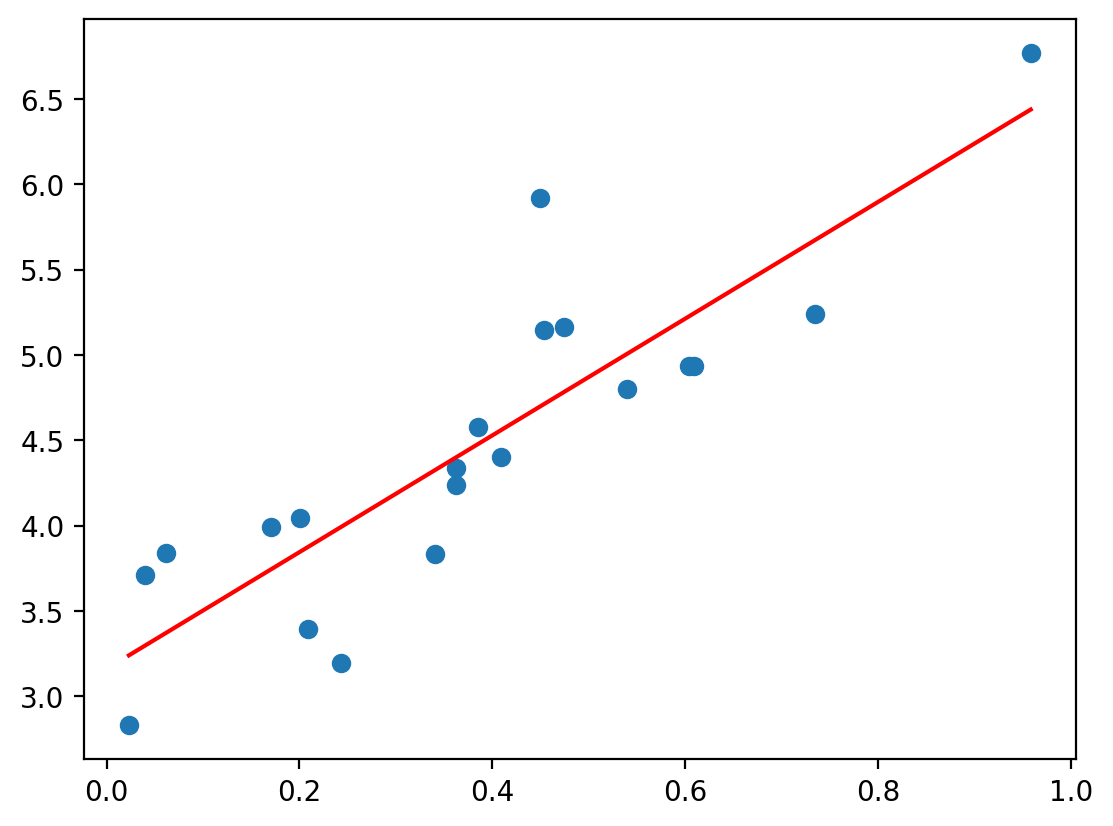

In [27]:
plot_linear_regression(x, y, 1)

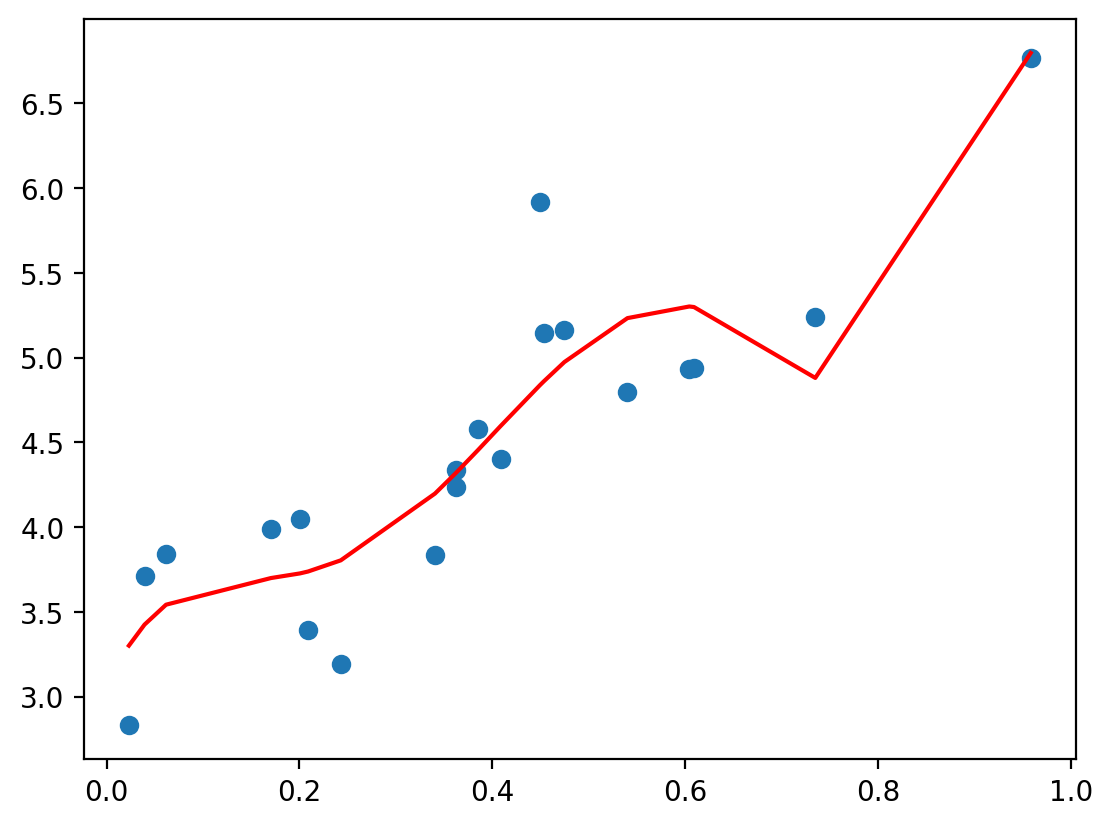

In [28]:
plot_linear_regression(x, y, 5)

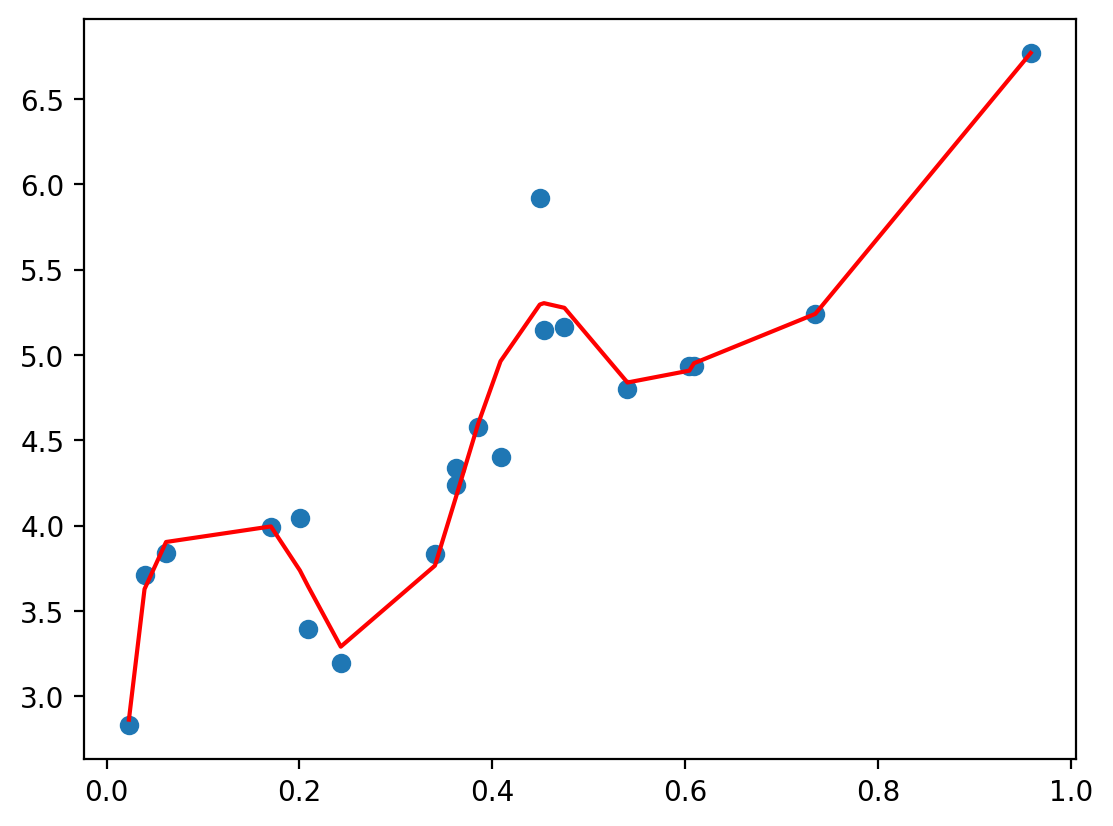

In [29]:
plot_linear_regression(x, y, 10)

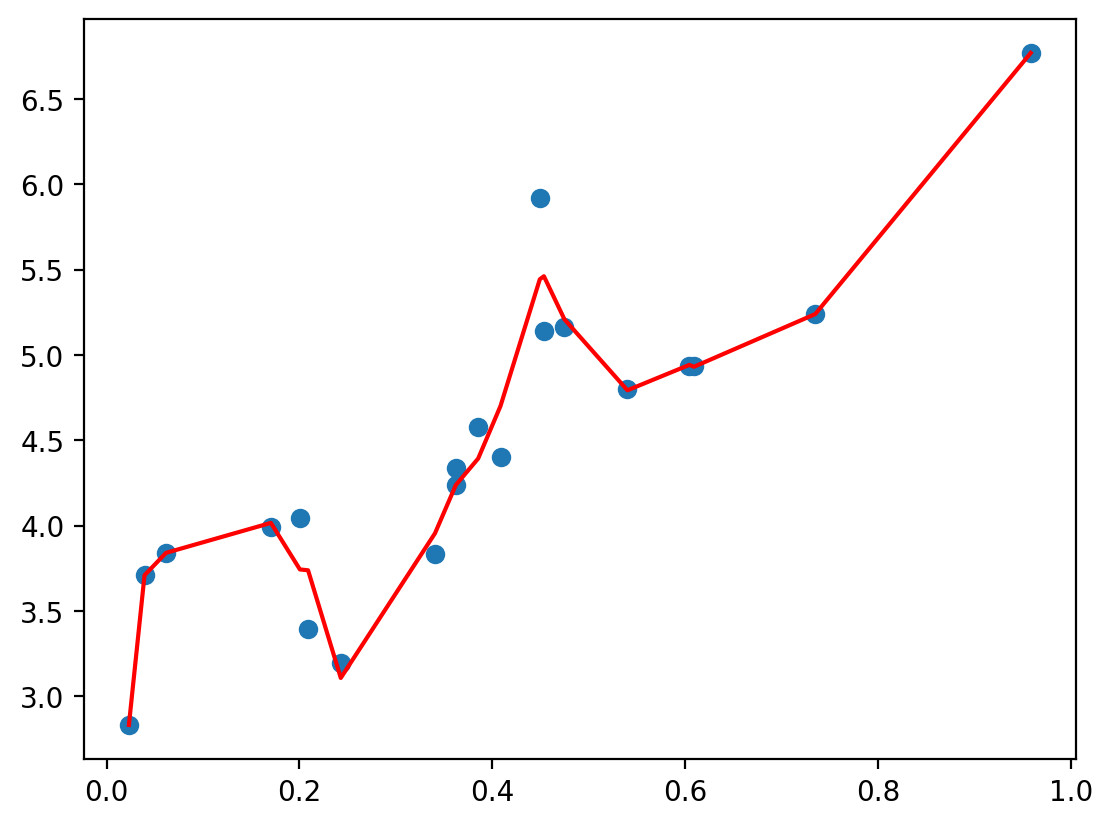

In [30]:
plot_linear_regression(x, y, 15)

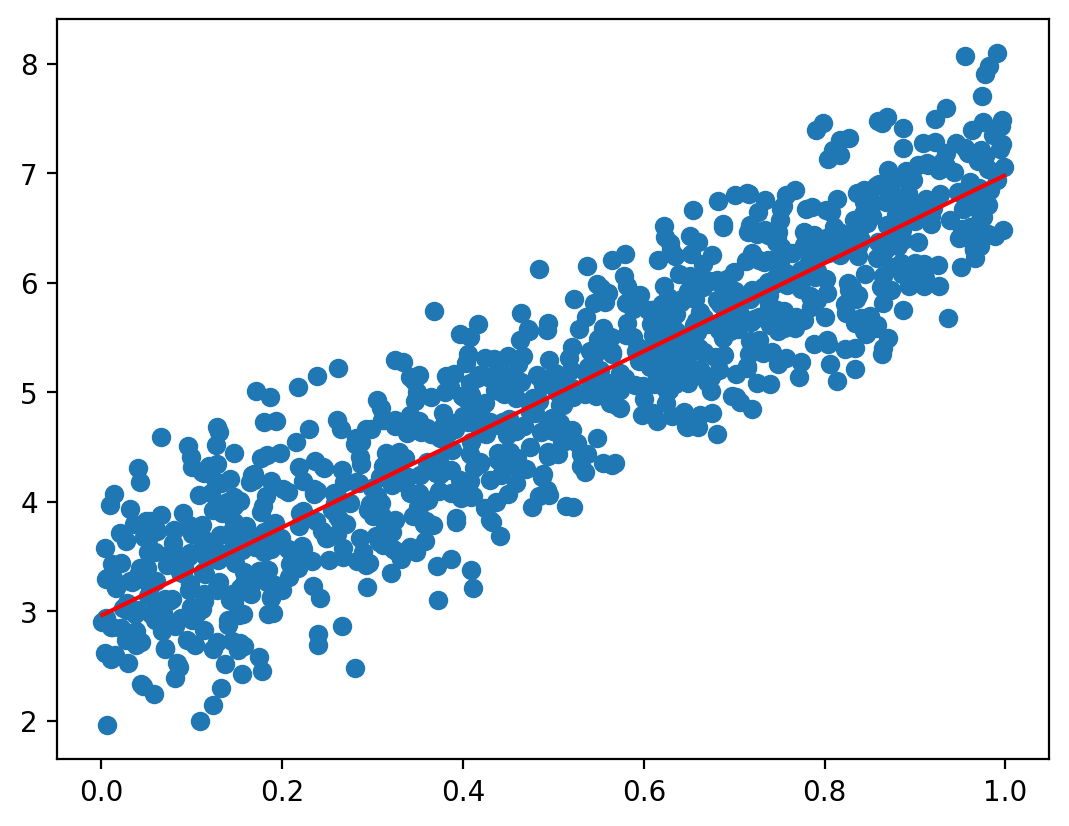

In [31]:
# Now, we see that if we increase the number of points, the model will fit better

n_points = 1000

x = np.random.uniform(0, 1, (n_points, 1))
# sort the x values
x = np.sort(x, axis=0)
y = 4 * x + 3 + np.random.normal(0, 0.5, (n_points, 1))

plot_linear_regression(x, y, 1)

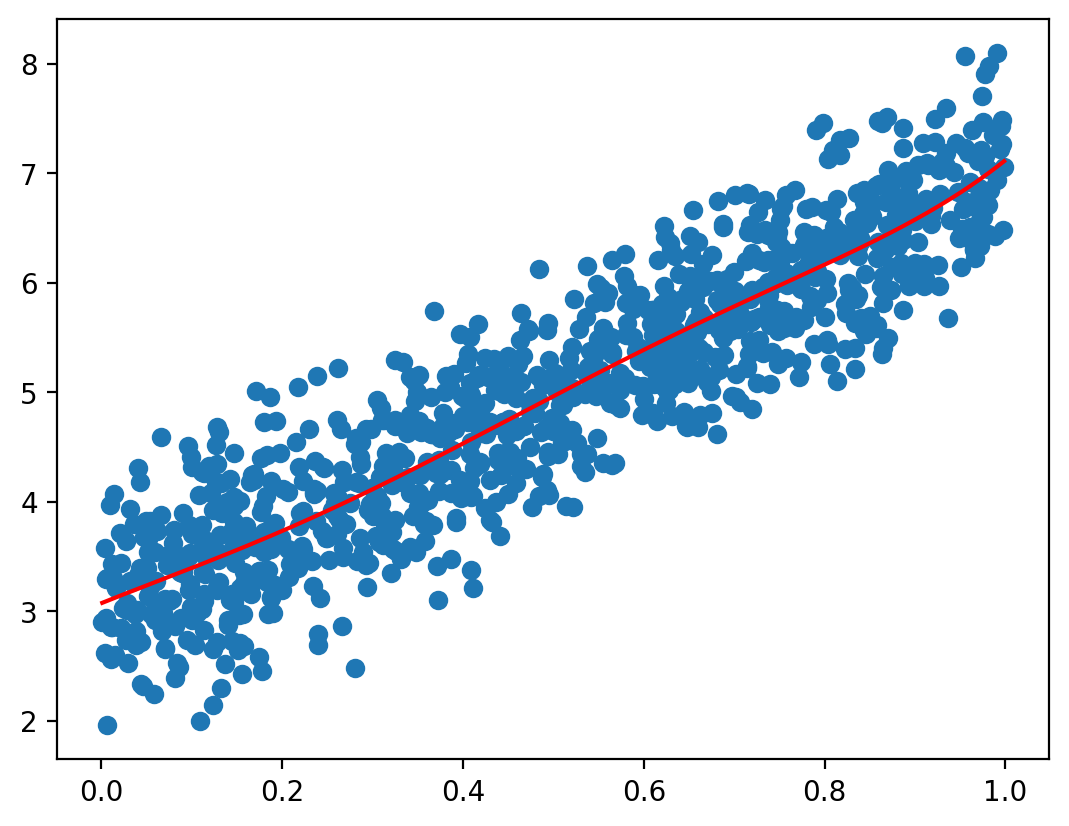

In [32]:
plot_linear_regression(x, y, 5)

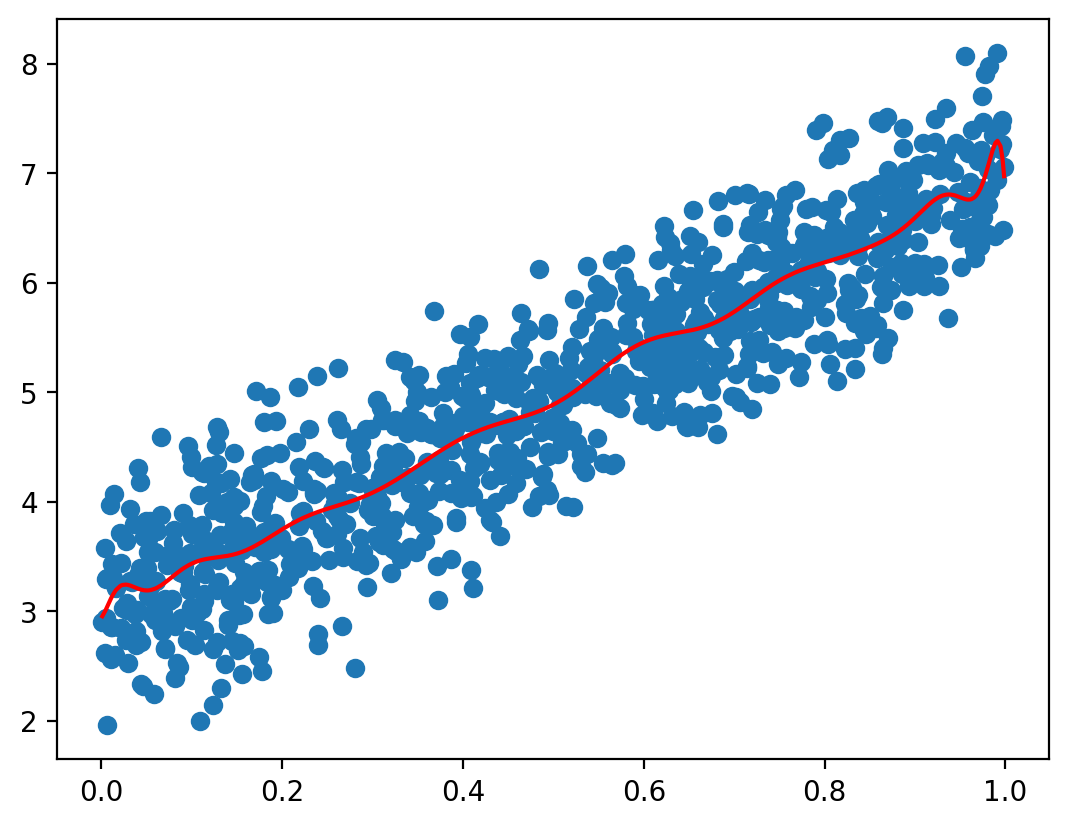

In [33]:
plot_linear_regression(x, y, 25)